In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
F = lambda N,r,k: r*k + (N-k)
def p_up(N,r,k,l):
  f = F(N,r,k)
  if k < N-1: return l*r/f + (1-l)*2*r/((1+r)*N)
  else: return l*r/f + (1-l)/N

def p_down(N,r,k,l):
  f = F(N,r,k)
  if k > 1: return l/f + (1-l)*2/((1+r)*N)
  else: return l/f + (1-l)/N

def gamma(N,r,k,l):
  return p_down(N,r,k,l) / p_up(N,r,k,l)

def prod(it):
  result = 1
  for x in it:
    result *= x
  return result

def fp(N,r,l):
  return 1/(1 + sum(
    prod(gamma(N,r,k,l) for k in range(1,j+1))
    for j in range(1,N)
  ))

In [ ]:
data = []
N = 100
for r in np.arange(0., 2.01, 0.01):
  # for l in np.arange(0., 1.01, 0.01):
  for l in np.arange(0., 1.01, 0.01):
    data.append((N, r, l, fp(N, r, l), fp(N, r, l)*N))

df = pd.DataFrame(data, columns=['N', 'r', 'l', 'fp', 'fp_normalized'])

In [4]:
sns.heatmap(
  df[df['N']==20].pivot_table(index='r', columns='l', values='fp'), cmap='viridis'
)

ValueError: zero-size array to reduction operation fmin which has no identity

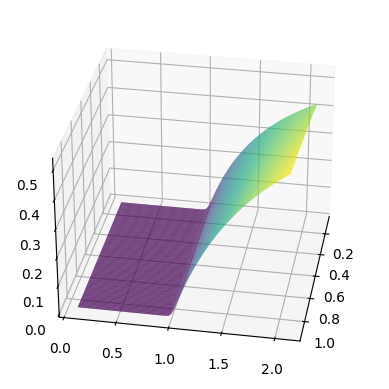

In [6]:
fig = plt.figure()
rdf = df[df['N']==100]
ax = fig.add_subplot(projection = '3d')
ax.plot_trisurf(rdf['l'], rdf['r'], rdf['fp'], cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(30, 10)
plt.show()

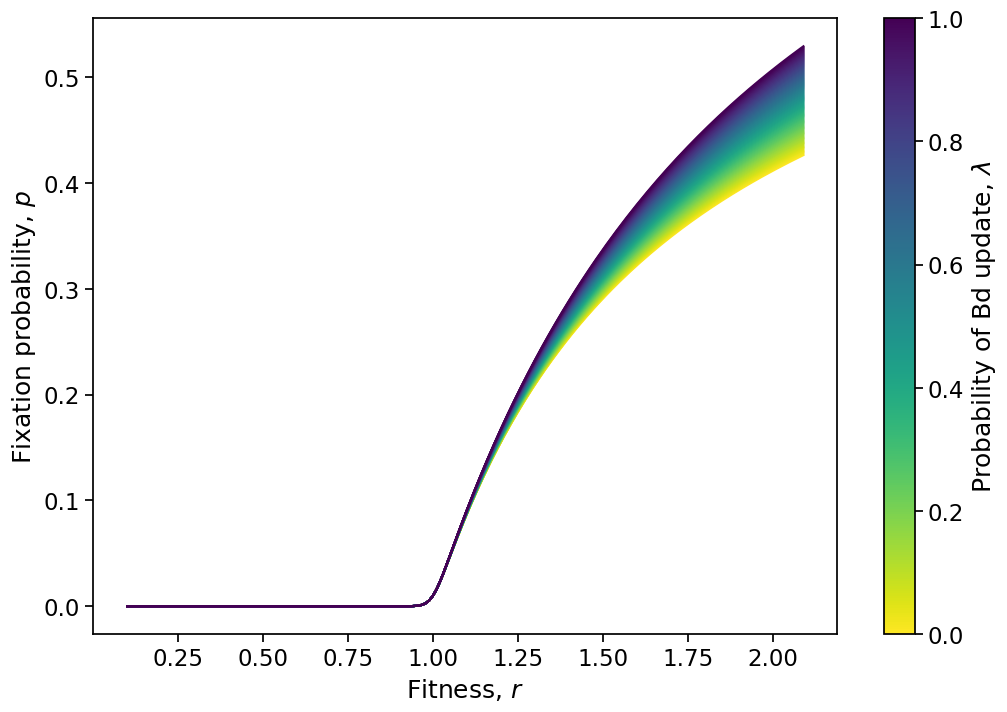

In [7]:
with sns.plotting_context('notebook', font_scale=1.5):
  fig = plt.figure(figsize=(12, 8))
  cmap = plt.cm.viridis_r
  g = sns.lineplot(data=rdf, x='r', y='fp', hue='l', legend=False, palette=cmap)
  g.set(xlabel='Fitness, $r$', ylabel='Fixation probability, $p$')
  norm = plt.Normalize(0,1)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
  g.figure.colorbar(sm, ax=g, label='Probability of Bd update, $\lambda$')

In [ ]:
g.figure.savefig('pics/cycle-N100.png', dpi=300, bbox_inches='tight')

In [12]:
df_simulation = pd.read_csv('./data/cycle-100-results.csv')

<Axes: xlabel='delta', ylabel='fixed'>

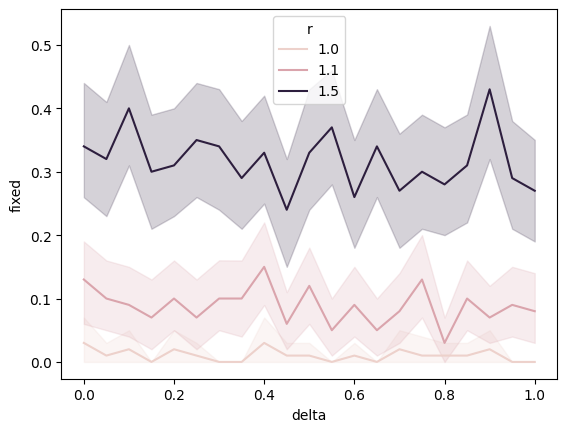

In [ ]:
g = sns.lineplot(
  data=df_simulation,
  x='delta',
  y='fixed',
  hue='r',
)

In [22]:
df_simulation_delta_examples = pd.read_csv('./data/cycle-10-results-delta-examples.csv')

In [31]:
df_formula_delta_examples = pd.DataFrame(data=[
  {
    'delta': delta,
    'r': r,
    'fp': fp(10, r, 1-delta),
  }
  for r in np.arange(0.0, 2.01, 0.01)
  for delta in (0, .25, .5, .75, 1)
  ]
)

df = df_formula_delta_examples

baseline = (
  df.loc[df['delta'] == 0.5, ['r', 'fp']]
    .rename(columns={'fp': 'fp_base'})
)
df = df.merge(baseline, on='r', how='left')
df['normalized_fp'] = df['fp'] / df['fp_base']

/var/folders/nr/wh_xmblj0d57jnlt98fssqqh0000gp/T/ipykernel_44110/490134871.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  return p_down(N,r,k,l) / p_up(N,r,k,l)


In [34]:
df_formula_delta_examples = df

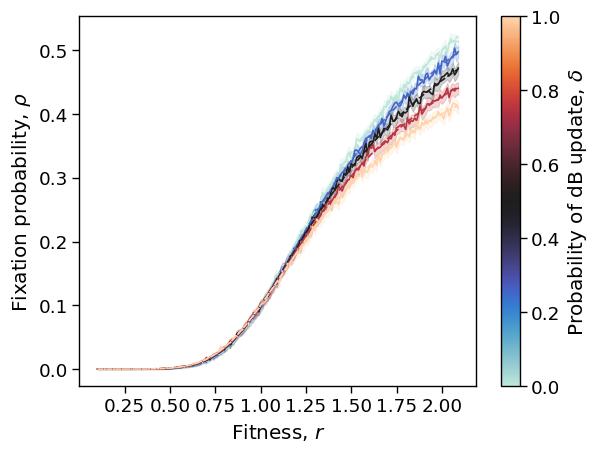

In [36]:
with sns.plotting_context('paper', font_scale=1.5):
  cmap = sns.color_palette('icefire', as_cmap=True)
  g = sns.lineplot(
    data=df_simulation_delta_examples,
    x='r',
    y='fixed',
    hue='delta',
    palette=cmap,
    legend=False,
  )
  sns.lineplot(
    data=df_formula_delta_examples,
    x='r',
    y='fp',
    hue='delta',
    palette=cmap,
    legend=False,
    linestyle='--',
  ) 
  g.set(xlabel='Fitness, $r$', ylabel=r'Fixation probability, $\rho$')
  norm = plt.Normalize(0,1)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
  g.figure.colorbar(sm, ax=g, label=r'Probability of dB update, $\delta$')

In [41]:
g.figure.savefig('./pics/cycle-10-delta-examples.svg', dpi=600, bbox_inches='tight')

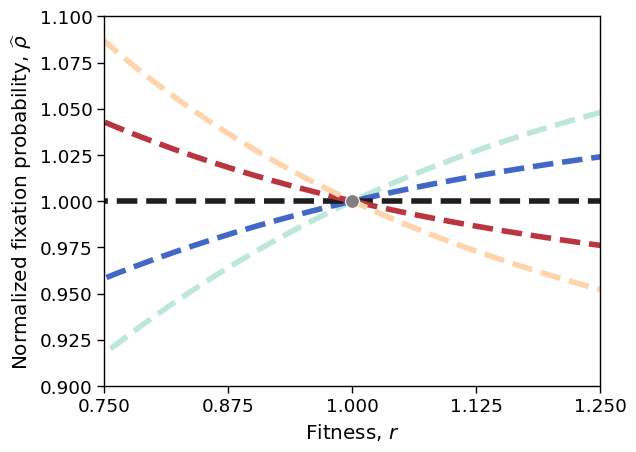

In [66]:
with sns.plotting_context('paper', font_scale=1.5):
  cmap = sns.color_palette('icefire', as_cmap=True)
  g = sns.lineplot(
    data=df_formula_delta_examples,
    x='r',
    y='normalized_fp',
    hue='delta',
    palette=cmap,
    legend=False,
    linestyle='--',
    lw=4,
  )
  g.set(
    xlim=(.75, 1.25),
    ylim=(1-.1, 1+.1),
    xticks=[.75, (1+.75)/2, 1.0, (1+1.25)/2, 1.25],
    xlabel=r'Fitness, $r$',
    ylabel=r'Normalized fixation probability, $\widehat{\rho}$',
  )
  sns.scatterplot(x=[1], y=[1], s=100, color='grey', zorder=7, ax=g)

In [67]:
g.figure.savefig('./pics/normalized-fp-cycle-10.svg', bbox_inches='tight')

<Axes: xlabel='r', ylabel='fp'>

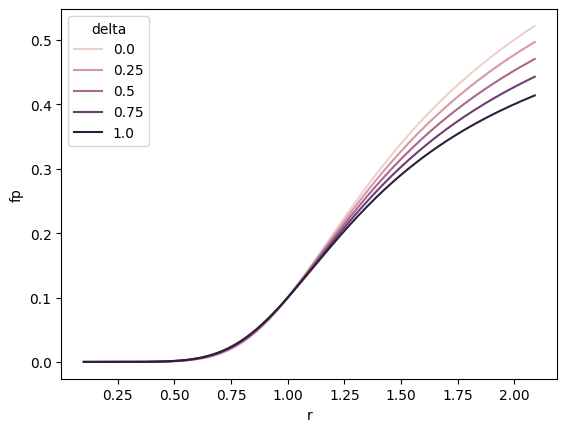

In [33]:
sns.lineplot(
  data=df_formula,
  x='r',
  y='fp',
  hue='delta',
)

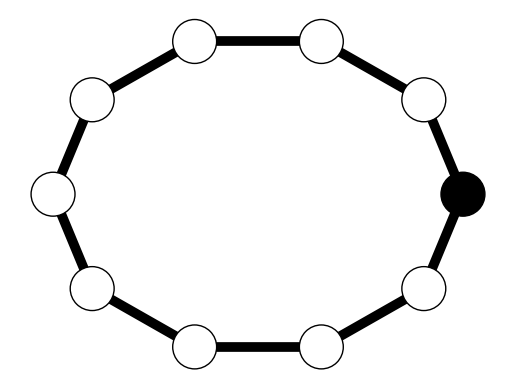

In [57]:
import networkx as nx
fig, ax = plt.subplots()
nx.draw(
  G:=nx.cycle_graph(10),
  pos=nx.kamada_kawai_layout(G),
  node_color=['black']+['white']*9,
  edge_color='black',
  edgecolors='black',
  width=7,
  node_size=1000,
  ax=ax,
)

In [59]:
fig.savefig('./pics/cycle-10.svg', transparent=True, bbox_inches='tight')

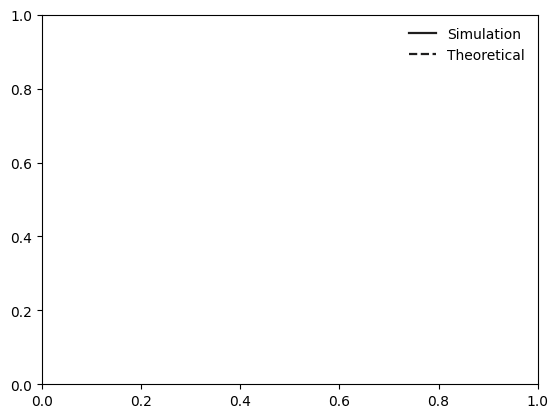

In [70]:
from matplotlib.lines import Line2D

custom_lines = [Line2D([0], [0], color=cmap(.5), lw=1.6),
                Line2D([0], [0], color=cmap(.5), linestyle='--', lw=1.6)]

fig, ax = plt.subplots()
# lines = ax.plot(data)
ax.legend(custom_lines, ['Simulation', 'Theoretical'], frameon=False)


In [71]:
fig.savefig('./pics/legend.svg', transparent=True, bbox_inches='tight')

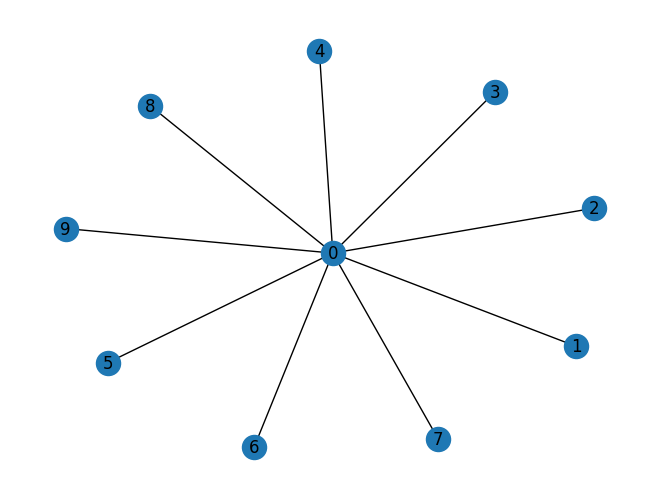

In [73]:
G = nx.star_graph(10-1)
nx.draw(G, with_labels=True)